This is Bag


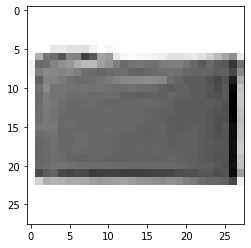

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#欣賞數據集

n = 1234
print('This is', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

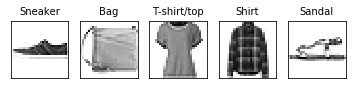

In [4]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [5]:
#資料整理

x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_train[5678]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [12]:
#打造神經網路

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
model = Sequential()

model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
#組裝神經網路

model.compile(loss='mse', optimizer=SGD(lr=0.99), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
784*100+100

78500

In [16]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [17]:
#訓練

model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0371 - accuracy: 0.7394
Epoch 2/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0247 - accuracy: 0.8298
Epoch 3/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0222 - accuracy: 0.8480
Epoch 4/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0207 - accuracy: 0.8574
Epoch 5/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0197 - accuracy: 0.8644
Epoch 6/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0188 - accuracy: 0.8715
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0183 - accuracy: 0.8745
Epoch 8/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0177 - accuracy: 0.8788
Epoch 9/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0173 - accuracy: 0.8819
Epoch 10/20
6

The result predicted by RNN is Dress


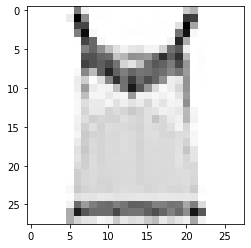

In [21]:
#訓練成果

result = model.predict_classes(x_test)


n = 5566
print('The result predicted by RNN is', class_names[result[n]] )
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [24]:
#準確率

test_loss, test_acc = model.evaluate(x_test,y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [26]:
print(f'testloss：{test_loss}\n accuracy: {test_acc}')

testloss：0.02015229689255357
 accuracy: 0.8592000007629395
